In [1]:
import pandas as pd 
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv("my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df1=pd.get_dummies(df)
df1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [4]:
frequent_itemsets=apriori(df1,min_support=0.5,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [5]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [6]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
38,"(V1_Gladiator, Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
31,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
32,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
33,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
34,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
35,(V1_Gladiator),"(Patriot, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
36,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


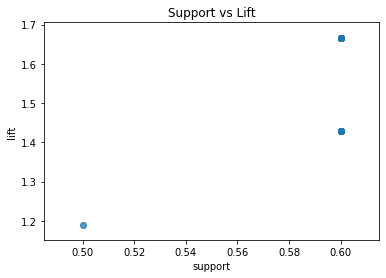

In [8]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()